In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from jedi.api.refactoring import rename
from numpy.ma.extras import apply_over_axes

plt.style.use("fivethirtyeight")

In [2]:
apartments = pd.read_csv('../data/sarajevo_flats_merged_olx_cleaned.csv')
apartments.head()

,title,url,price_numeric,municipality,condition,ad_type,property_type,rooms,square_m2,equipment,level,heating,price_per_m2
0,Stan Apartman - [Iznajmljivanje],https://olx.ba/artikal/71698283,60.0,Sarajevo - Novi Grad,Novogradnja,Iznajmljivanje,Apartman,2.0,46.0,Namješten,7,Centralno (gradsko),1.304348
1,Stan Sarajevo - Novo Sarajevo - [Iznajmljivanje],https://olx.ba/artikal/71573692,80.0,Sarajevo - Novo Sarajevo,Renoviran,Iznajmljivanje,Apartman,2.0,62.0,Namješten,16,Centralno (gradsko),1.290323
2,Garaza - Nova Vogosca - 20 m2 - [Iznajmljivanje],https://olx.ba/artikal/70756410,100.0,Vogošća,Novogradnja,Iznajmljivanje,Stan,2.0,20.0,Namješten,-1,Centralno (Kotlovnica),5.000000
3,Panorama View Apartman Bjelasnica (Rent) - [Iz...,https://olx.ba/artikal/71554658,160.0,Trnovo,Novogradnja,Iznajmljivanje,Apartman,2.0,50.0,Namješten,0,Struja,3.200000
4,Stanovi i apartmani Sarajevo - Novi Grad - [Iz...,https://olx.ba/artikal/71474528,200.0,Sarajevo - Novi Grad,Dobro stanje,Iznajmljivanje,Apartman,1.0,30.0,Namješten,1,Centralno (Kotlovnica),6.666667


In [3]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1806 non-null   object 
 1   url            1806 non-null   object 
 2   price_numeric  1428 non-null   float64
 3   municipality   1806 non-null   object 
 4   condition      1806 non-null   object 
 5   ad_type        1806 non-null   object 
 6   property_type  1806 non-null   object 
 7   rooms          1664 non-null   float64
 8   square_m2      1806 non-null   float64
 9   equipment      1806 non-null   object 
 10  level          1806 non-null   object 
 11  heating        1806 non-null   object 
 12  price_per_m2   1428 non-null   float64
dtypes: float64(4), object(9)
memory usage: 183.6+ KB


In [4]:
apartments['municipality'] =  apartments['municipality'].astype('category')
apartments['municipality'].unique()

['Sarajevo - Novi Grad', 'Sarajevo - Novo Sarajevo', 'Vogošća', 'Trnovo', 'Sarajevo - Centar', 'Sarajevo - Stari Grad', 'Ilidža', 'Ilijaš', 'Hadžići']
Categories (9, object): ['Hadžići', 'Ilidža', 'Ilijaš', 'Sarajevo - Centar', ..., 'Sarajevo - Novo Sarajevo', 'Sarajevo - Stari Grad', 'Trnovo', 'Vogošća']

In [5]:
apartments['condition'] = apartments['condition'].astype('category')
apartments['condition'].unique()

['Novogradnja', 'Renoviran', 'Dobro stanje', 'Parcijalno renoviran', 'Za renoviranje', 'Apartman', 'U izgradnji']
Categories (7, object): ['Apartman', 'Dobro stanje', 'Novogradnja', 'Parcijalno renoviran', 'Renoviran', 'U izgradnji', 'Za renoviranje']

In [6]:
apartments[apartments['condition'] == 'Apartman']

,title,url,price_numeric,municipality,condition,ad_type,property_type,rooms,square_m2,equipment,level,heating,price_per_m2
628,DVOSOBAN APARTMAN / NOVOGRADNJA STELLA / Bjela...,https://olx.ba/artikal/71280693,197184.0,Trnovo,Apartman,Prodaja,Apartman,2.0,37.92,Nenamješten,2,Struja,5200.0


In [7]:
apartments['ad_type'] = apartments['ad_type'].astype('category')
apartments['ad_type'].unique()

['Iznajmljivanje', 'Prodaja']
Categories (2, object): ['Iznajmljivanje', 'Prodaja']

In [8]:
apartments['property_type'] = apartments['property_type'].astype('category')
apartments['property_type'].unique()

['Apartman', 'Stan']
Categories (2, object): ['Apartman', 'Stan']

In [9]:
apartments['rooms'].value_counts()

rooms
3.0    656
2.0    560
4.0    277
1.0    171
Name: count, dtype: int64

In [10]:
apartments['square_m2'].value_counts()

square_m2
50.00     52
70.00     41
54.00     39
80.00     39
53.00     35
          ..
102.00     1
220.00     1
30.10      1
38.95      1
38.52      1
Name: count, Length: 301, dtype: int64

In [11]:
apartments['equipment'] = apartments['equipment'].astype('category')
apartments['equipment'].unique()

['Namješten', 'Nenamješten', 'Polunamješten']
Categories (3, object): ['Namješten', 'Nenamješten', 'Polunamješten']

In [12]:
apartments['level'].unique()

array(['7', '16', '-1', '0', '1', '3', '2', '4', '5', '14', '6', '10',
       '13', '15', '-2', '8', '11', '9', '19', '12', '18', '17', '20+',
       '-3'], dtype=object)

In [13]:
apartments[apartments['level'] == '20+']

,title,url,price_numeric,municipality,condition,ad_type,property_type,rooms,square_m2,equipment,level,heating,price_per_m2
643,Stan Sarajevo - Novo sarajevo,https://olx.ba/artikal/70883958,200000.0,Sarajevo - Novo Sarajevo,Parcijalno renoviran,Prodaja,Stan,2.0,45.00,Polunamješten,20+,Centralno (gradsko),4444.444444
805,NN Nekretnine : Dvosoban stan - Hrasno,https://olx.ba/artikal/71755213,255000.0,Sarajevo - Novi Grad,Za renoviranje,Prodaja,Stan,2.0,56.00,Namješten,20+,Centralno (gradsko),4553.571429
934,MODERNO RENOVIRAN I OPREMLJEN ČETVOROSOBAN STAN,https://olx.ba/artikal/66616379,299900.0,Sarajevo - Novo Sarajevo,Renoviran,Prodaja,Stan,4.0,76.00,Namješten,20+,Struja,3946.052632
1164,"SARAJEVO TOWER STAN 71,50 m2",https://olx.ba/artikal/68255376,399000.0,Sarajevo - Centar,Novogradnja,Prodaja,Stan,3.0,71.50,Nenamješten,20+,Centralno (gradsko),5580.419580
1324,Biro HM/ Sarajevo Tower trosoban stan 99m2,https://olx.ba/artikal/71750719,550000.0,Sarajevo - Novo Sarajevo,Novogradnja,Prodaja,Stan,3.0,99.00,Namješten,20+,Centralno (Plin),5555.555556
1325,HITNO!!! Trosoban Stan Sarajevo Tower,https://olx.ba/artikal/69004499,550000.0,Sarajevo - Novo Sarajevo,Novogradnja,Prodaja,Stan,3.0,92.00,Namješten,20+,Centralno (gradsko),5978.260870
1326,MY SPACE/ Stan/ Sarajevo Tower/ NOVOGRADNJA/ N...,https://olx.ba/artikal/69072756,550000.0,Sarajevo - Novo Sarajevo,Novogradnja,Prodaja,Stan,3.0,92.00,Namješten,20+,Centralno (gradsko),5978.260870
1382,"CASA MIA / Penthouse / 145,55 m2 / Sarajevo Tower",https://olx.ba/artikal/67622446,698640.0,Sarajevo - Novo Sarajevo,Novogradnja,Prodaja,Stan,NaN,145.55,Nenamješten,20+,Ostalo,4800.000000
1390,NN Nekretnine : Dvoetažni penthouse 145m2 - Sa...,https://olx.ba/artikal/66440777,713195.0,Sarajevo - Novo Sarajevo,Novogradnja,Prodaja,Stan,NaN,145.55,Nenamješten,20+,Centralno (gradsko),4900.000000
1409,"CASA MIA / Penthouse / 192,53 m2 / Sarajevo Tower",https://olx.ba/artikal/67622950,924144.0,Sarajevo - Novo Sarajevo,Novogradnja,Prodaja,Stan,4.0,192.53,Nenamješten,20+,Ostalo,4800.000000


In [14]:
apartments['heating'] = apartments['heating'].astype('category')
apartments['heating'].unique()

['Centralno (gradsko)', 'Centralno (Kotlovnica)', 'Struja', 'Centralno (Plin)', 'Plin', 'Drva', 'Ostalo']
Categories (7, object): ['Centralno (Kotlovnica)', 'Centralno (Plin)', 'Centralno (gradsko)', 'Drva', 'Ostalo', 'Plin', 'Struja']

In [15]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   title          1806 non-null   object  
 1   url            1806 non-null   object  
 2   price_numeric  1428 non-null   float64 
 3   municipality   1806 non-null   category
 4   condition      1806 non-null   category
 5   ad_type        1806 non-null   category
 6   property_type  1806 non-null   category
 7   rooms          1664 non-null   float64 
 8   square_m2      1806 non-null   float64 
 9   equipment      1806 non-null   category
 10  level          1806 non-null   object  
 11  heating        1806 non-null   category
 12  price_per_m2   1428 non-null   float64 
dtypes: category(6), float64(4), object(3)
memory usage: 110.9+ KB


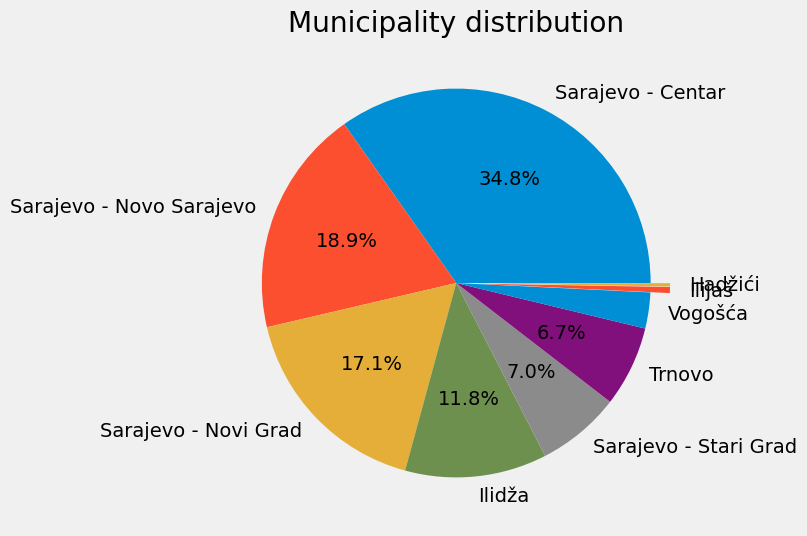

In [16]:
municipality_count = apartments['municipality'].value_counts()
def autopct_fmt(pct):
    return ('%.1f%%' % pct) if pct > 3 else ''  # hide <3% labe

plt.figure(figsize=(6,6))
plt.pie(municipality_count, labels=municipality_count.index.values, autopct=autopct_fmt, explode=[0.1 if val / municipality_count.sum() <= 0.01 else 0 for val in municipality_count ])
plt.title('Municipality distribution')
plt.savefig('../ProjectPitch/Images/MunicipalityDistributionPie.pdf',  bbox_inches='tight')

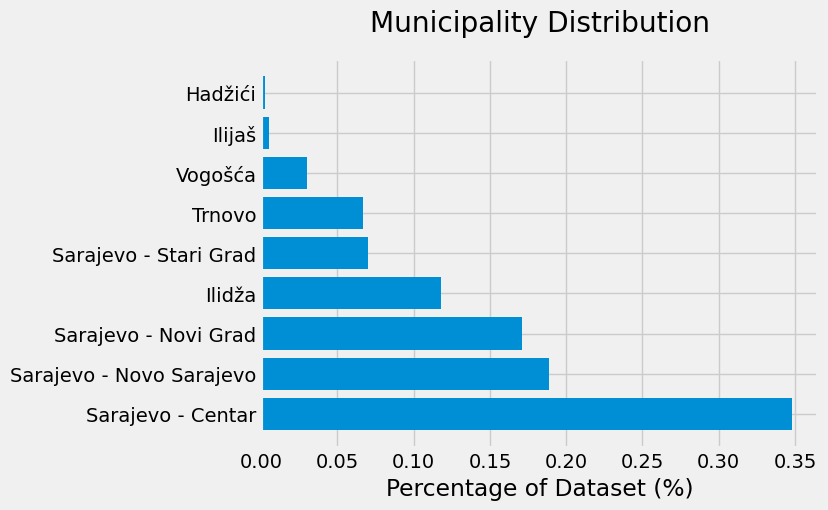

In [17]:
plt.barh(municipality_count.index.values, width=municipality_count / municipality_count.sum())
plt.xlabel("Percentage of Dataset (%)")
plt.title("Municipality Distribution", pad=20)
plt.savefig('../ProjectPitch/Images/MunicipalityDistributionBar.pdf',  bbox_inches='tight')

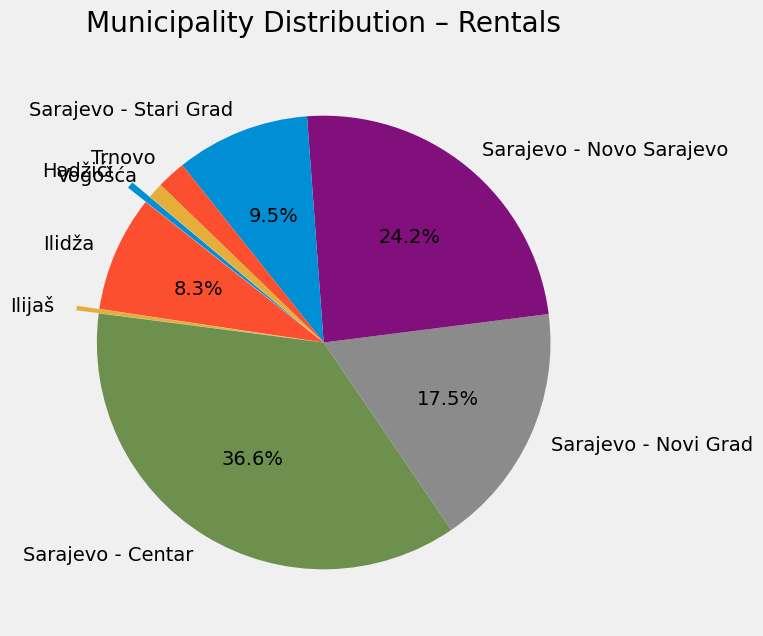

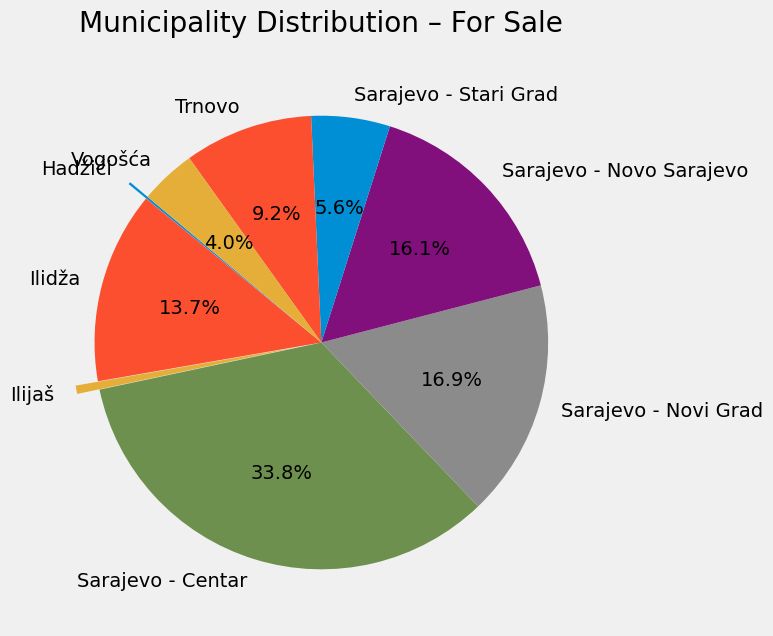

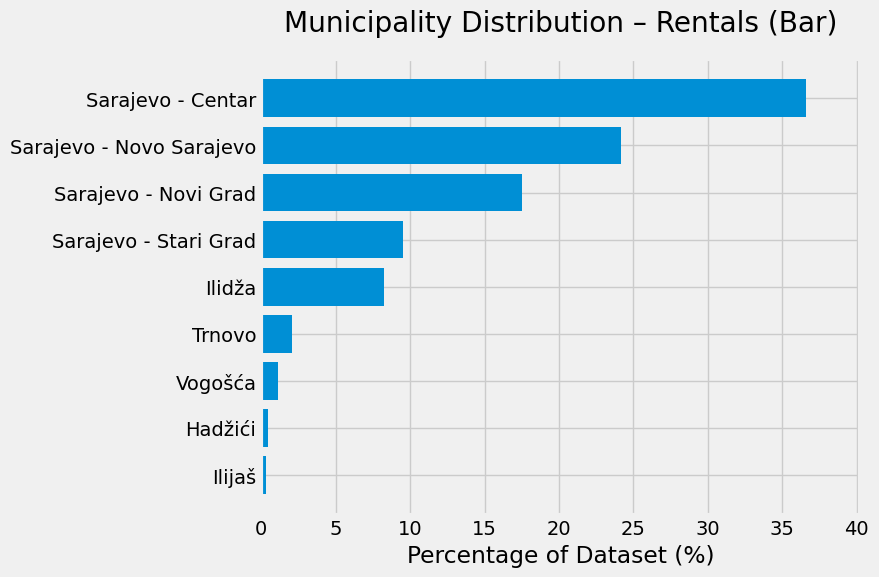

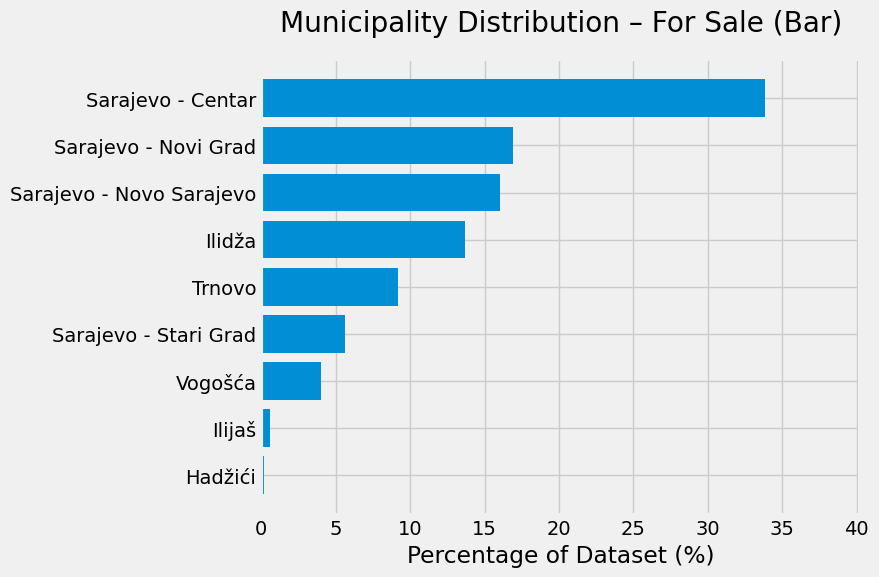

In [18]:
# Split data
rentals = apartments[apartments['ad_type'] == 'Iznajmljivanje']
apartments_for_sale = apartments[apartments['ad_type'] == 'Prodaja']

# Count municipalities and normalize to percentages
rental_munis = rentals['municipality'].value_counts().sort_index()
sale_munis = apartments_for_sale['municipality'].value_counts().sort_index()

rental_munis_pct = (rental_munis / rental_munis.sum() * 100).sort_values()
sale_munis_pct = (sale_munis / sale_munis.sum() * 100).sort_values()

# Formatting helper
def autopct_fmt(pct):
    return ('%.1f%%' % pct) if pct > 3 else ''

# -------- PIE CHART: Rentals --------
explode_rental = [0.1 if val / rental_munis.sum() <= 0.01 else 0 for val in rental_munis]

plt.figure(figsize=(7, 7))
plt.pie(
    rental_munis,
    labels=rental_munis.index.values,
    autopct=autopct_fmt,
    explode=explode_rental,
    startangle=140
)
plt.title('Municipality Distribution – Rentals', pad=20)
plt.savefig('../ProjectPitch/Images/MunicipalityDistributionRentalsPie.pdf', bbox_inches='tight')
plt.show()

# -------- PIE CHART: For Sale --------
explode_sale = [0.1 if val / sale_munis.sum() <= 0.01 else 0 for val in sale_munis]

plt.figure(figsize=(7, 7))
plt.pie(
    sale_munis,
    labels=sale_munis.index.values,
    autopct=autopct_fmt,
    explode=explode_sale,
    startangle=140
)
plt.title('Municipality Distribution – For Sale', pad=20)
plt.savefig('../ProjectPitch/Images/MunicipalityDistributionForSalePie.pdf', bbox_inches='tight')
plt.show()

# -------- HORIZONTAL BAR CHARTS --------
# Share the same x-axis limit
xlim_max = max(rental_munis_pct.max(), sale_munis_pct.max()) * 1.1

plt.figure(figsize=(9, 6))
plt.barh(rental_munis_pct.index.values, rental_munis_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.xlim(0, xlim_max)
plt.title("Municipality Distribution – Rentals (Bar)", pad=20)
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/MunicipalityDistributionRentalsBar.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(9, 6))
plt.barh(sale_munis_pct.index.values, sale_munis_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.xlim(0, xlim_max)
plt.title("Municipality Distribution – For Sale (Bar)", pad=20)
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/MunicipalityDistributionForSaleBar.pdf', bbox_inches='tight')
plt.show()

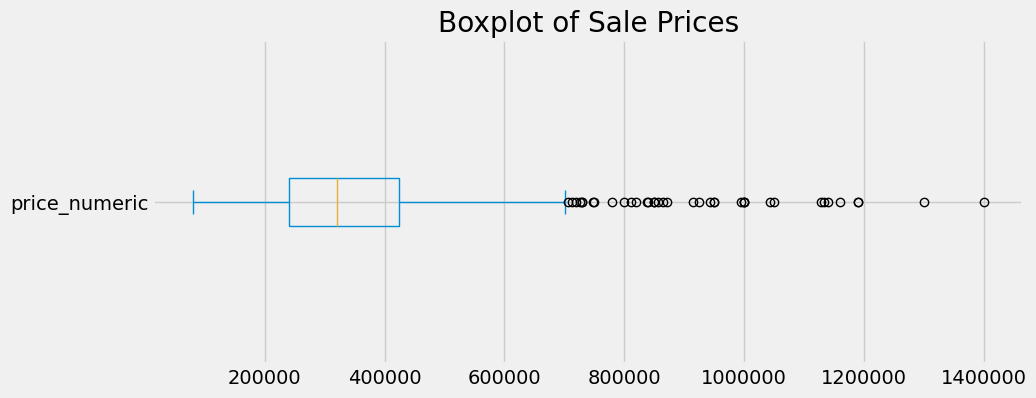

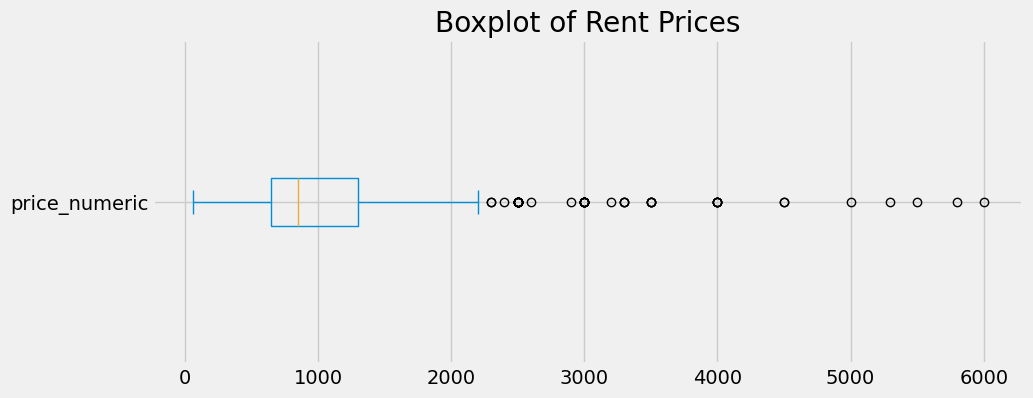

In [19]:
sale_prices = apartments[apartments['ad_type'] == 'Prodaja']['price_numeric']
rent_price = apartments[apartments['ad_type'] == 'Iznajmljivanje']['price_numeric']

sale_prices.plot.box(vert=False, figsize=(10, 4), title="Boxplot of Sale Prices")
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('../ProjectPitch/Images/SalePriceBoxPlot.pdf', bbox_inches='tight')
plt.show()

rent_price.plot.box(vert=False, figsize=(10, 4), title="Boxplot of Rent Prices")
plt.savefig('../ProjectPitch/Images/RentPriceBoxPlot.pdf', bbox_inches='tight')




In [20]:
sale_prices.describe()

count    9.020000e+02
mean     3.574978e+05
std      1.778976e+05
min      8.000000e+04
25%      2.400000e+05
50%      3.200000e+05
75%      4.249750e+05
max      1.400000e+06
Name: price_numeric, dtype: float64

In [21]:
rent_price.describe()

count     526.000000
mean     1153.665399
std       849.455439
min        60.000000
25%       650.000000
50%       850.000000
75%      1300.000000
max      6000.000000
Name: price_numeric, dtype: float64

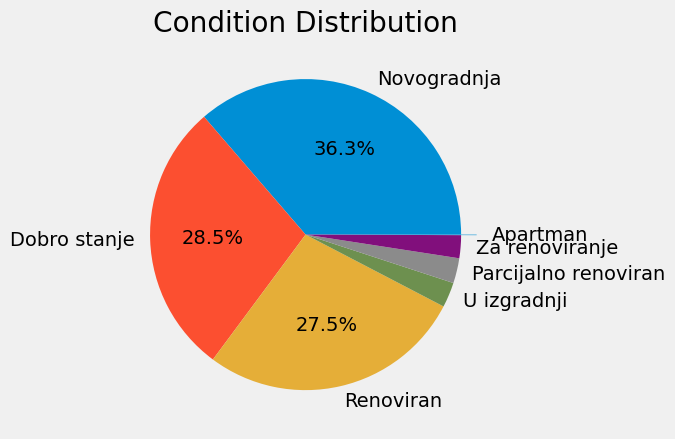

In [22]:
conditions = apartments['condition'].value_counts()
plt.pie(conditions, labels=conditions.index.values, autopct=autopct_fmt, explode=[0.1 if val / conditions.sum() <= 0.01 else 0 for val in  conditions])
plt.title('Condition Distribution')
plt.savefig('../ProjectPitch/Images/ConditionsDistributionPie.pdf',  bbox_inches='tight' )

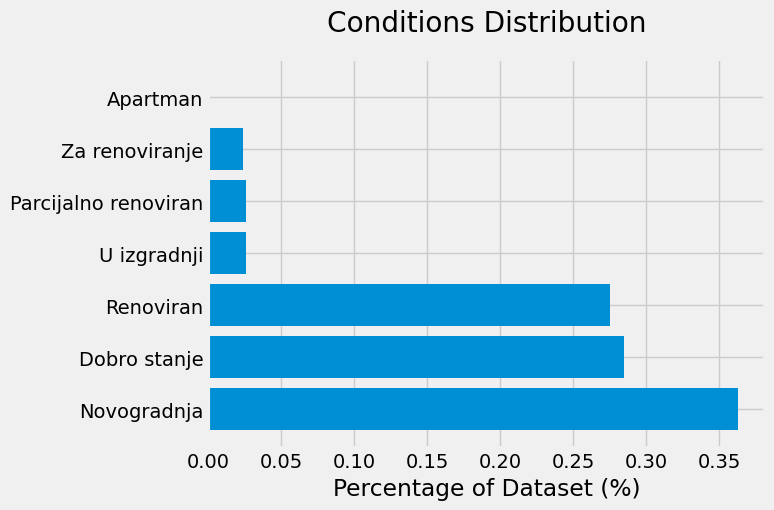

In [23]:
plt.barh(conditions.index.values, width=conditions / conditions.sum())
plt.xlabel("Percentage of Dataset (%)")
plt.title("Conditions Distribution", pad=20)
plt.savefig('../ProjectPitch/Images/ConditionsDistributionBar.pdf',  bbox_inches='tight')

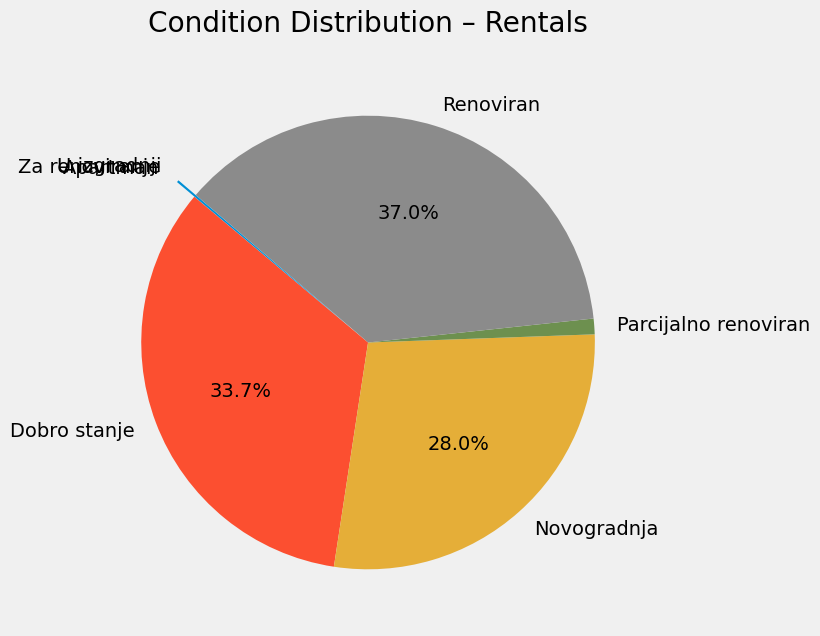

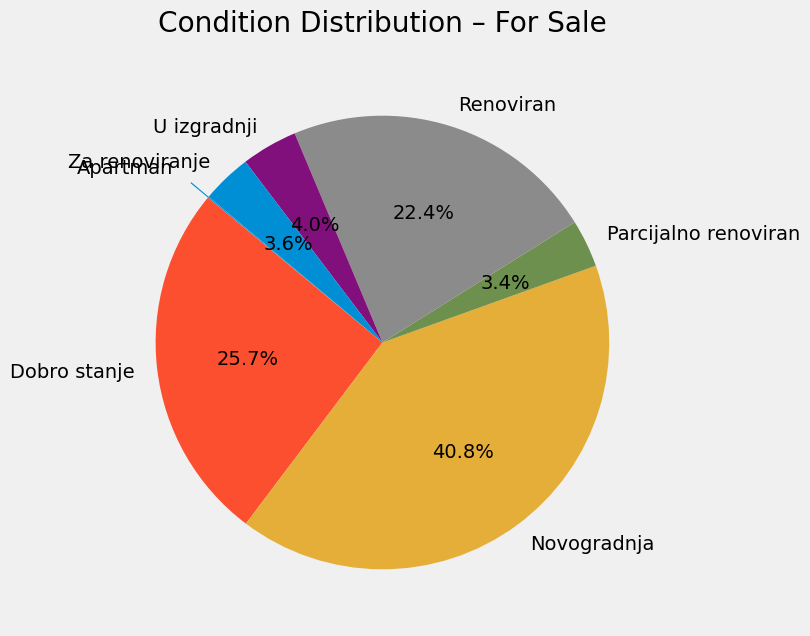

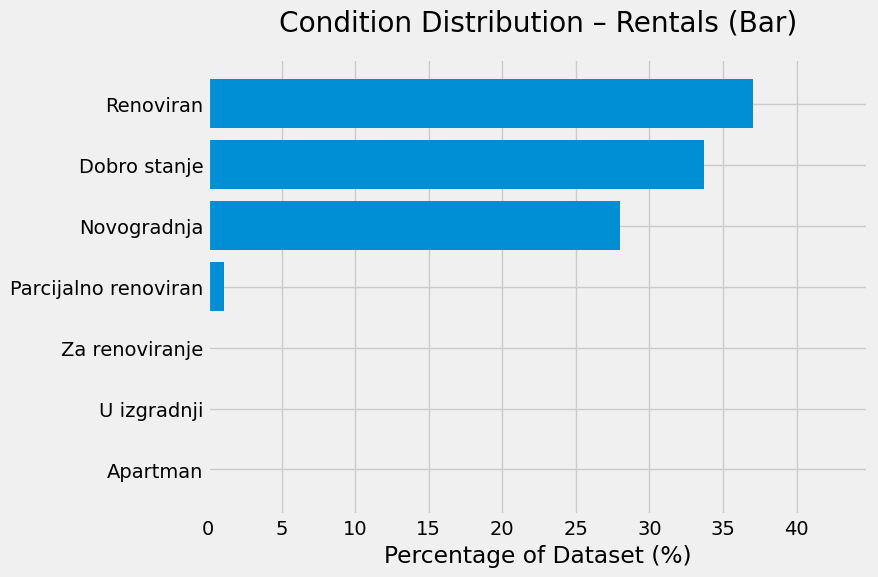

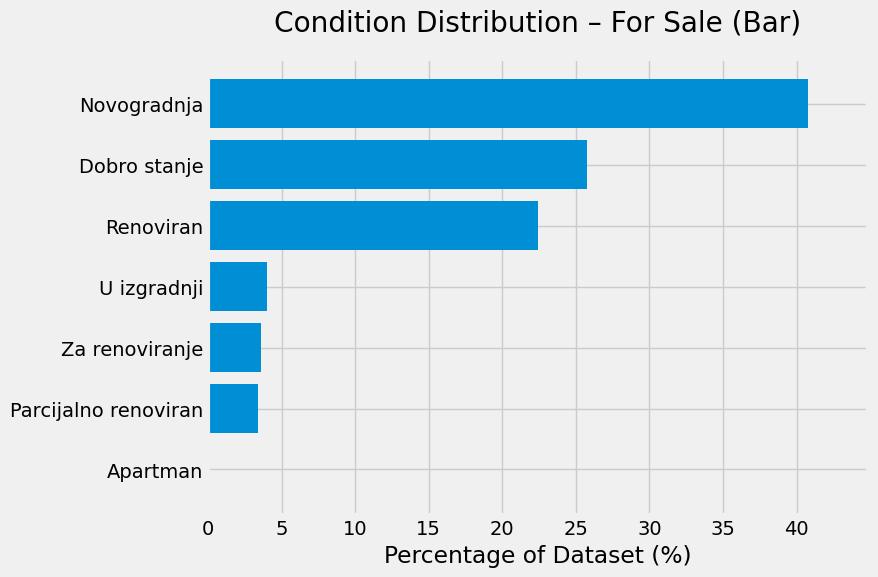

In [24]:
rentals = apartments[apartments['ad_type'] == 'Iznajmljivanje']
apartments_for_sale = apartments[apartments['ad_type'] == 'Prodaja']

# Count condition values
rental_conditions = rentals['condition'].value_counts().sort_index()
sale_conditions = apartments_for_sale['condition'].value_counts().sort_index()

rental_conditions_pct = (rental_conditions / rental_conditions.sum() * 100).sort_values()
sale_conditions_pct = (sale_conditions / sale_conditions.sum() * 100).sort_values()

# Formatting
def autopct_fmt(pct):
    return ('%.1f%%' % pct) if pct > 3 else ''

# ---------- PIE: Rentals ----------
explode_rental = [0.1 if val / rental_conditions.sum() <= 0.01 else 0 for val in rental_conditions]

plt.figure(figsize=(7, 7))
plt.pie(
    rental_conditions,
    labels=rental_conditions.index.values,
    autopct=autopct_fmt,
    explode=explode_rental,
    startangle=140
)
plt.title('Condition Distribution – Rentals', pad=20)
plt.savefig('../ProjectPitch/Images/ConditionsDistributionRentalsPie.pdf', bbox_inches='tight')
plt.show()

# ---------- PIE: For Sale ----------
explode_sale = [0.1 if val / sale_conditions.sum() <= 0.01 else 0 for val in sale_conditions]

plt.figure(figsize=(7, 7))
plt.pie(
    sale_conditions,
    labels=sale_conditions.index.values,
    autopct=autopct_fmt,
    explode=explode_sale,
    startangle=140
)
plt.title('Condition Distribution – For Sale', pad=20)
plt.savefig('../ProjectPitch/Images/ConditionsDistributionForSalePie.pdf', bbox_inches='tight')
plt.show()

# ---------- BAR CHARTS ----------
xlim_max = max(rental_conditions_pct.max(), sale_conditions_pct.max()) * 1.1

plt.figure(figsize=(9, 6))
plt.barh(rental_conditions_pct.index.values, rental_conditions_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.xlim(0, xlim_max)
plt.title("Condition Distribution – Rentals (Bar)", pad=20)
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/ConditionsDistributionRentalsBar.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(9, 6))
plt.barh(sale_conditions_pct.index.values, sale_conditions_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.xlim(0, xlim_max)
plt.title("Condition Distribution – For Sale (Bar)", pad=20)
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/ConditionsDistributionForSaleBar.pdf', bbox_inches='tight')
plt.show()

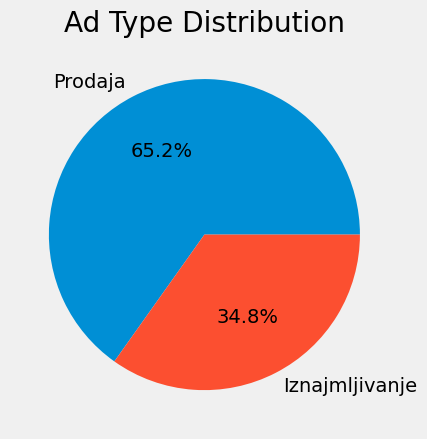

In [25]:
ad_types = apartments['ad_type'].value_counts()
plt.pie(ad_types, labels=ad_types.index.values, autopct=autopct_fmt, explode=[0.1 if val /ad_types.sum() <= 0.01 else 0 for val in ad_types])
plt.title('Ad Type Distribution')
plt.savefig('../ProjectPitch/Images/AdTypeDistributioPie.pdf',  bbox_inches='tight')

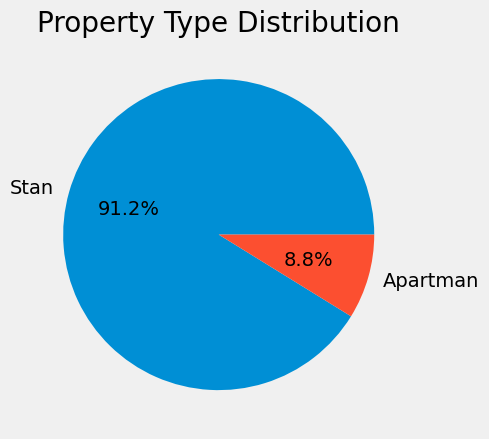

In [26]:
property_types = apartments['property_type'].value_counts()
plt.pie(property_types, labels=property_types.index.values, autopct=autopct_fmt, explode=[0.1 if val /property_types.sum() <= 0.01 else 0 for val in property_types])
plt.title('Property Type Distribution')
plt.savefig('../ProjectPitch/Images/PropertyTypeDistributioPie.pdf',  bbox_inches='tight')


In [27]:
apartments.columns

Index(['title', 'url', 'price_numeric', 'municipality', 'condition', 'ad_type',
       'property_type', 'rooms', 'square_m2', 'equipment', 'level', 'heating',
       'price_per_m2'],
      dtype='object')

In [28]:
rentals = apartments[apartments['ad_type'] == 'Iznajmljivanje']
apartments_for_sale = apartments[apartments['ad_type'] == 'Prodaja']

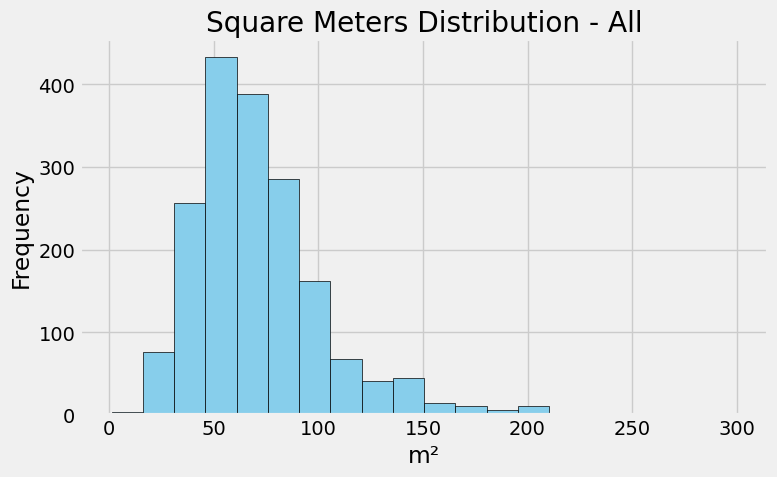

In [29]:
square_meters = apartments['square_m2']

plt.figure(figsize=(8, 5))
plt.hist(square_meters, bins=20, color='skyblue', edgecolor='black')
plt.title('Square Meters Distribution - All')
plt.xlabel('m²')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/SquareMeterDistributioHist.pdf',  bbox_inches='tight')
plt.show()


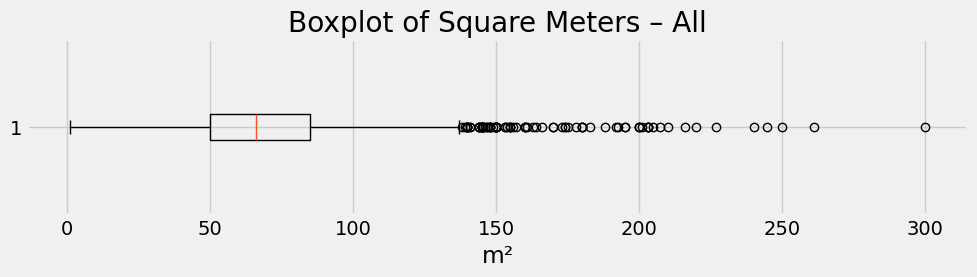

In [30]:
plt.figure(figsize=(10, 3))
plt.boxplot(square_meters, vert=False)
plt.title("Boxplot of Square Meters – All")
plt.xlabel('m²')
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/SquareMeterBoxPlot.pdf', bbox_inches='tight')
plt.show()


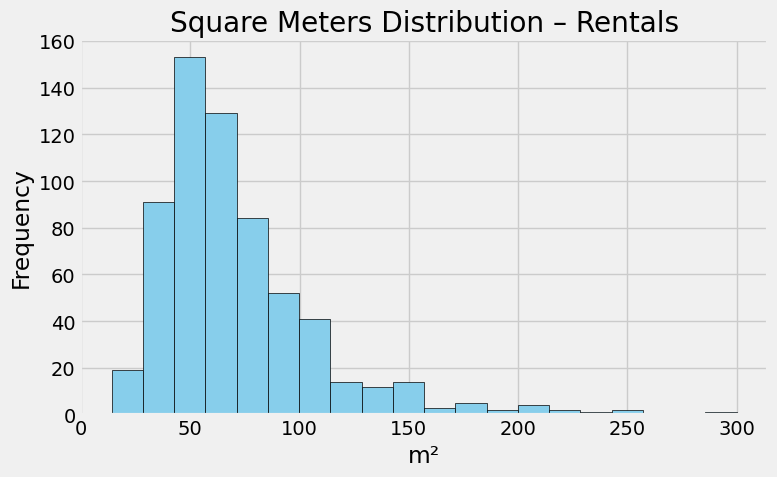

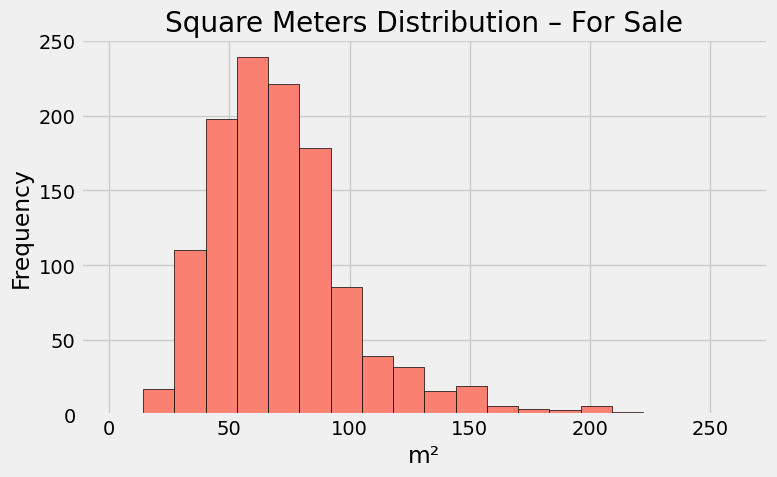

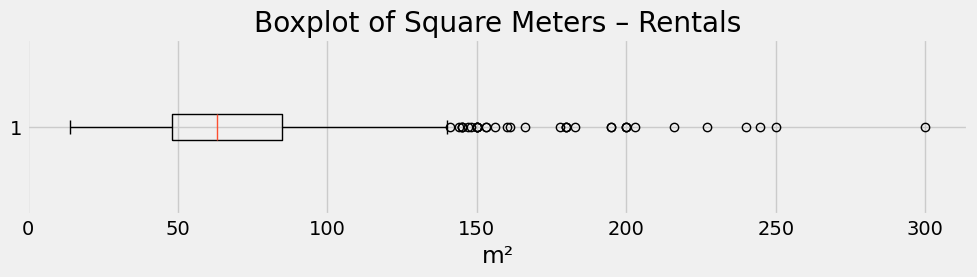

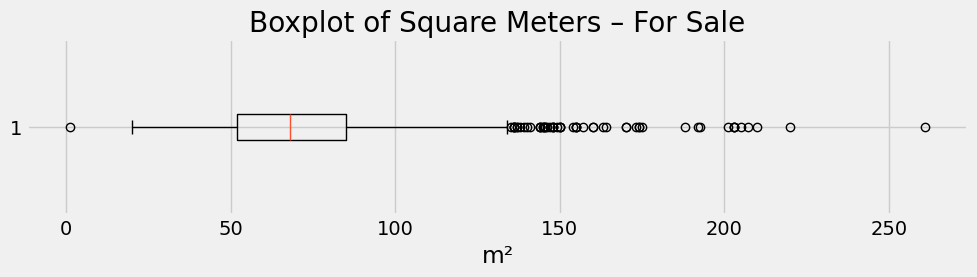

In [31]:
# Split data
rentals = apartments[apartments['ad_type'] == 'Iznajmljivanje']['square_m2']
sale_apartments = apartments[apartments['ad_type'] == 'Prodaja']['square_m2']

# ---------- HISTOGRAMS ----------
plt.figure(figsize=(8, 5))
plt.hist(rentals, bins=20, color='skyblue', edgecolor='black')
plt.title('Square Meters Distribution – Rentals')
plt.xlabel('m²')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/SquareMetersDistributionRentalsHist.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(sale_apartments, bins=20, color='salmon', edgecolor='black')
plt.title('Square Meters Distribution – For Sale')
plt.xlabel('m²')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/SquareMetersDistributionSaleHist.pdf', bbox_inches='tight')
plt.show()

# ---------- BOXPLOTS ----------
plt.figure(figsize=(10, 3))
plt.boxplot(rentals, vert=False)
plt.title("Boxplot of Square Meters – Rentals")
plt.xlabel('m²')
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/SquareMetersBoxPlotRentals.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 3))
plt.boxplot(sale_apartments, vert=False)
plt.title("Boxplot of Square Meters – For Sale")
plt.xlabel('m²')
plt.tight_layout()
plt.savefig('../ProjectPitch/Images/SquareMetersBoxPlotSale.pdf', bbox_inches='tight')
plt.show()

In [32]:
square_meters.describe()


count    1806.000000
mean       71.933672
std        32.895796
min         1.132000
25%        50.000000
50%        66.000000
75%        85.000000
max       300.000000
Name: square_m2, dtype: float64

In [33]:
rentals.describe()

count    629.000000
mean      71.175342
std       36.884942
min       14.000000
25%       48.000000
50%       63.000000
75%       85.000000
max      300.000000
Name: square_m2, dtype: float64

In [34]:
sale_apartments.describe()

count    1177.000000
mean       72.338931
std        30.560279
min         1.132000
25%        52.000000
50%        68.000000
75%        85.000000
max       261.000000
Name: square_m2, dtype: float64

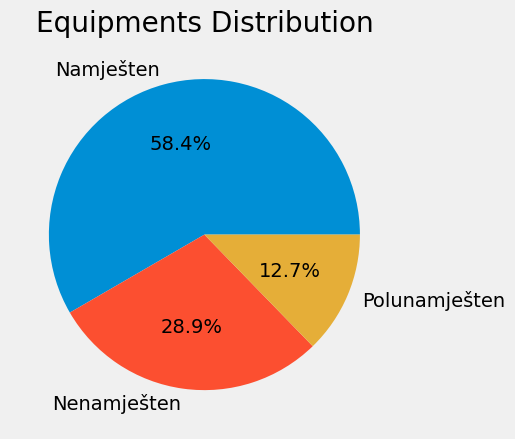

In [35]:
equipments = apartments['equipment'].value_counts()
plt.pie(equipments, labels=equipments.index.values, autopct=autopct_fmt, explode=[0.1 if val /equipments.sum() <= 0.01 else 0 for val in equipments])
plt.title('Equipments Distribution')
plt.savefig('../ProjectPitch/Images/EquipmentsDistributioPie.pdf',  bbox_inches='tight')


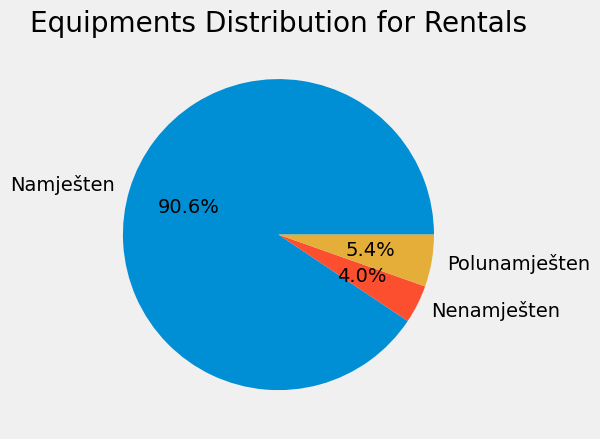

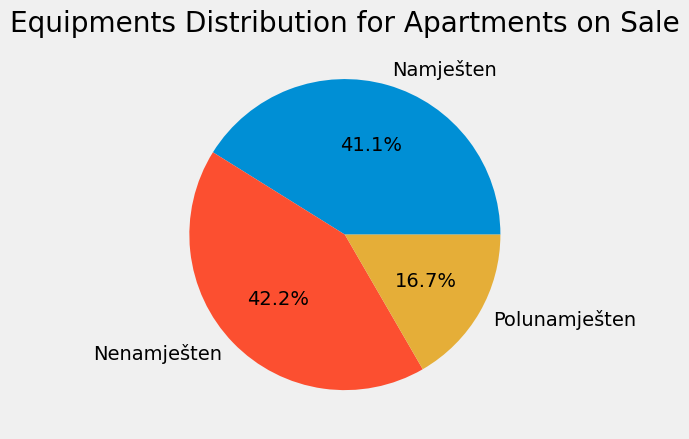

In [36]:
rentals = apartments[apartments['ad_type'] == 'Iznajmljivanje']
apartments_for_sale = apartments[apartments['ad_type'] == 'Prodaja']

rental_equipments = rentals['equipment'].value_counts().sort_index()
apartments_for_sale_equipments = apartments_for_sale['equipment'].value_counts().sort_index()

plt.pie(rental_equipments, labels=rental_equipments.index.values, autopct=autopct_fmt, explode=[0.1 if val /rental_equipments.sum() <= 0.01 else 0 for val in rental_equipments])
plt.title('Equipments Distribution for Rentals')
plt.savefig('../ProjectPitch/Images/EquipmentsForRentalsDistributioPie.pdf',  bbox_inches='tight')
plt.show()

plt.pie(apartments_for_sale_equipments, labels=apartments_for_sale_equipments.index.values, autopct=autopct_fmt, explode=[0.1 if val /apartments_for_sale_equipments.sum() <= 0.01 else 0 for val in apartments_for_sale_equipments])
plt.title('Equipments Distribution for Apartments on Sale')
plt.savefig('../ProjectPitch/Images/EquipmentsForApartmentsOnSaleDistributioPie.pdf',  bbox_inches='tight')

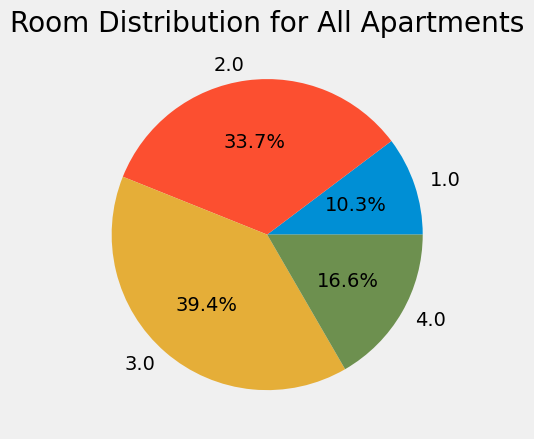

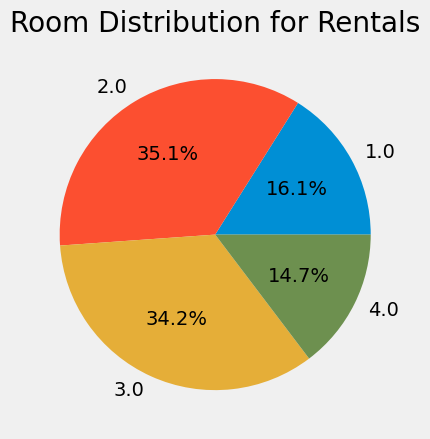

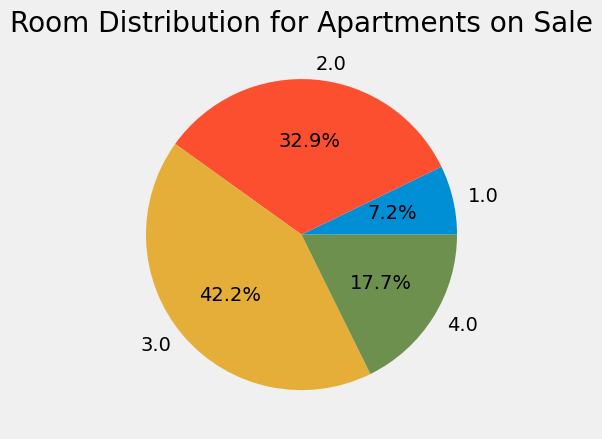

In [37]:
rooms = apartments['rooms'].value_counts().sort_index()
rental_rooms = rentals['rooms'].value_counts().sort_index()
apartments_for_sale_rooms = apartments_for_sale['rooms'].value_counts().sort_index()

# Pie plot: all apartments
plt.pie(
    rooms,
    labels=rooms.index.values,
    autopct=autopct_fmt,
    explode=[0.1 if val / rooms.sum() <= 0.01 else 0 for val in rooms]
)
plt.title('Room Distribution for All Apartments')
plt.savefig('../ProjectPitch/Images/RoomsAllApartmentsPie.pdf', bbox_inches='tight')
plt.show()

# Pie plot: rentals
plt.pie(
    rental_rooms,
    labels=rental_rooms.index.values,
    autopct=autopct_fmt,
    explode=[0.1 if val / rental_rooms.sum() <= 0.01 else 0 for val in rental_rooms]
)
plt.title('Room Distribution for Rentals')
plt.savefig('../ProjectPitch/Images/RoomsRentalsPie.pdf', bbox_inches='tight')
plt.show()

# Pie plot: for sale
plt.pie(
    apartments_for_sale_rooms,
    labels=apartments_for_sale_rooms.index.values,
    autopct=autopct_fmt,
    explode=[0.1 if val / apartments_for_sale_rooms.sum() <= 0.01 else 0 for val in apartments_for_sale_rooms]
)
plt.title('Room Distribution for Apartments on Sale')
plt.savefig('../ProjectPitch/Images/RoomsSalePie.pdf', bbox_inches='tight')
plt.show()

In [38]:
apartments.columns

Index(['title', 'url', 'price_numeric', 'municipality', 'condition', 'ad_type',
       'property_type', 'rooms', 'square_m2', 'equipment', 'level', 'heating',
       'price_per_m2'],
      dtype='object')

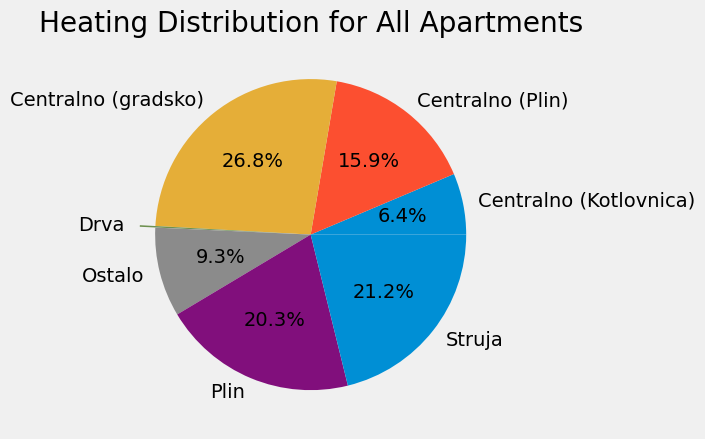

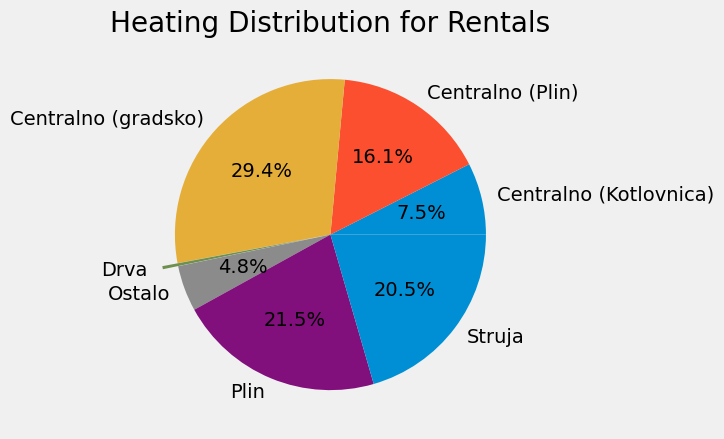

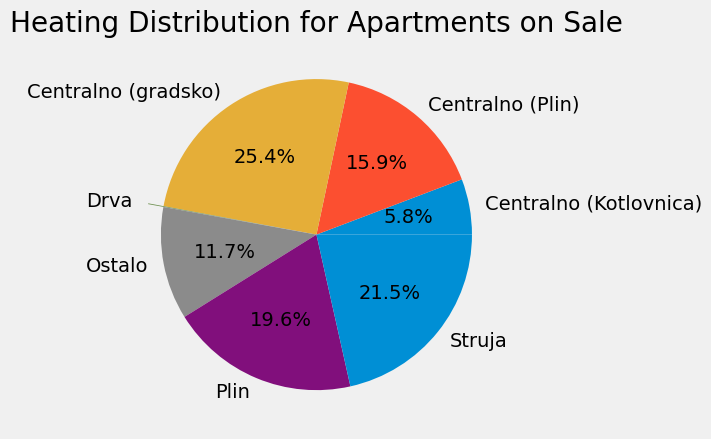

In [39]:
# Count heating types
heating = apartments['heating'].value_counts().sort_index()
rental_heating = rentals['heating'].value_counts().sort_index()
apartments_for_sale_heating = apartments_for_sale['heating'].value_counts().sort_index()

# -----------------------------
# All apartments
# -----------------------------
plt.pie(
    heating,
    labels=heating.index.values,
    autopct=autopct_fmt,
    explode=[0.1 if val / heating.sum() <= 0.01 else 0 for val in heating]
)
plt.title('Heating Distribution for All Apartments')
plt.savefig('../ProjectPitch/Images/HeatingAllApartmentsPie.pdf', bbox_inches='tight')
plt.show()

# -----------------------------
# Rentals
# -----------------------------
plt.pie(
    rental_heating,
    labels=rental_heating.index.values,
    autopct=autopct_fmt,
    explode=[0.1 if val / rental_heating.sum() <= 0.01 else 0 for val in rental_heating]
)
plt.title('Heating Distribution for Rentals')
plt.savefig('../ProjectPitch/Images/HeatingRentalsPie.pdf', bbox_inches='tight')
plt.show()

# -----------------------------
# Apartments for Sale
# -----------------------------
plt.pie(
    apartments_for_sale_heating,
    labels=apartments_for_sale_heating.index.values,
    autopct=autopct_fmt,
    explode=[0.1 if val / apartments_for_sale_heating.sum() <= 0.01 else 0 for val in apartments_for_sale_heating]
)
plt.title('Heating Distribution for Apartments on Sale')
plt.savefig('../ProjectPitch/Images/HeatingSalePie.pdf', bbox_inches='tight')
plt.show()

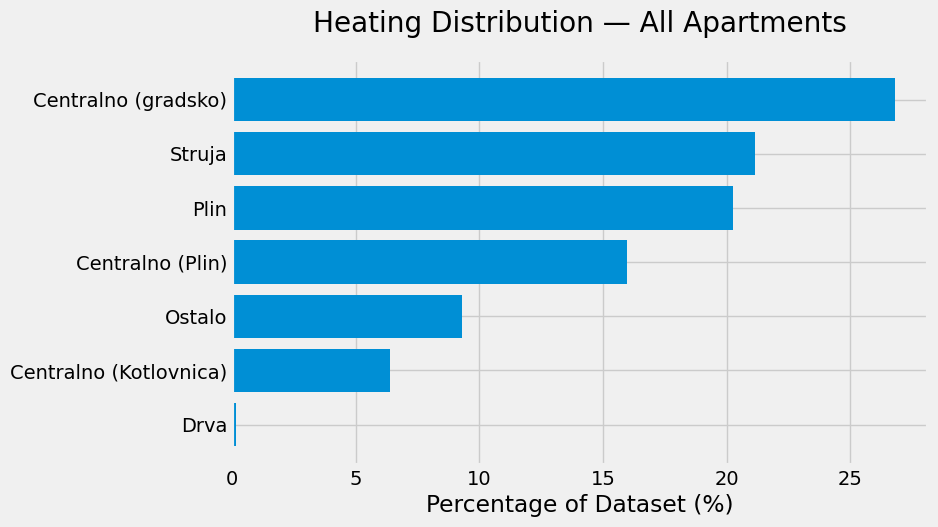

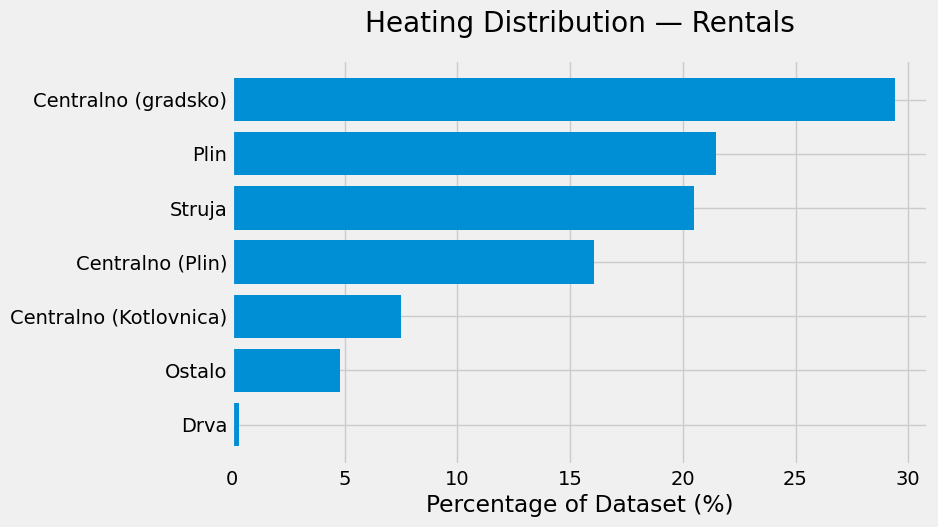

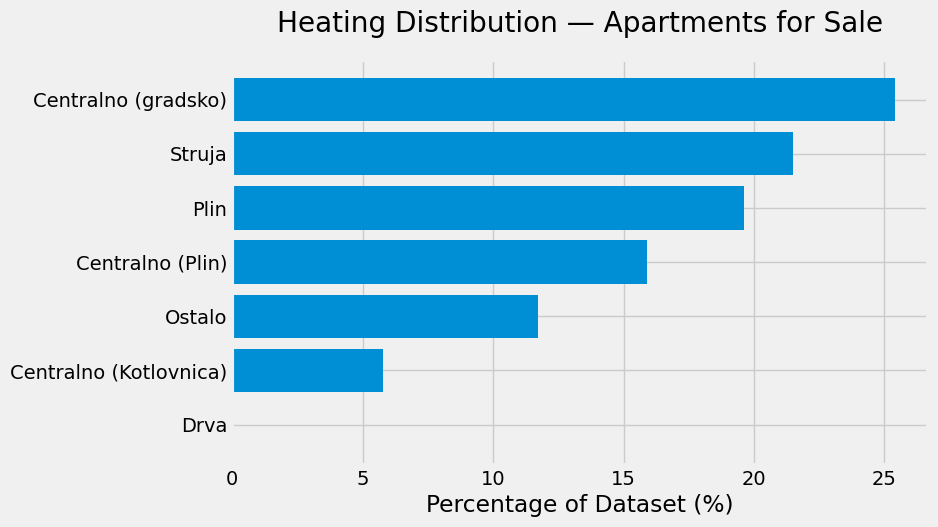

In [40]:
# Normalize to percentages
heating_pct = (heating / heating.sum() * 100).sort_values()
rental_heating_pct = (rental_heating / rental_heating.sum() * 100).sort_values()
apartments_for_sale_heating_pct = (apartments_for_sale_heating / apartments_for_sale_heating.sum() * 100).sort_values()

# --- All Apartments ---
plt.figure(figsize=(8, 5))
plt.barh(heating_pct.index.values, heating_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.title("Heating Distribution — All Apartments", pad=20)
plt.savefig('../ProjectPitch/Images/HeatingDistribution_All_Bar.pdf', bbox_inches='tight')
plt.show()

# --- Rentals ---
plt.figure(figsize=(8, 5))
plt.barh(rental_heating_pct.index.values, rental_heating_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.title("Heating Distribution — Rentals", pad=20)
plt.savefig('../ProjectPitch/Images/HeatingDistribution_Rentals_Bar.pdf', bbox_inches='tight')
plt.show()

# --- Apartments for Sale ---
plt.figure(figsize=(8, 5))
plt.barh(apartments_for_sale_heating_pct.index.values, apartments_for_sale_heating_pct.values)
plt.xlabel("Percentage of Dataset (%)")
plt.title("Heating Distribution — Apartments for Sale", pad=20)
plt.savefig('../ProjectPitch/Images/HeatingDistribution_Sale_Bar.pdf', bbox_inches='tight')
plt.show()